In [1]:
import tensorflow as tf
from keras import datasets, layers, models
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import random

In [2]:
# Load the dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
trainX, testX = trainX / 255.0, testX / 255.0

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

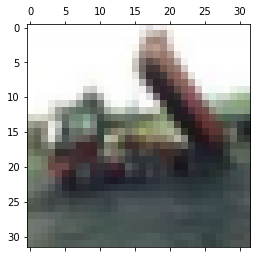

In [13]:
plt.matshow(trainX[2])

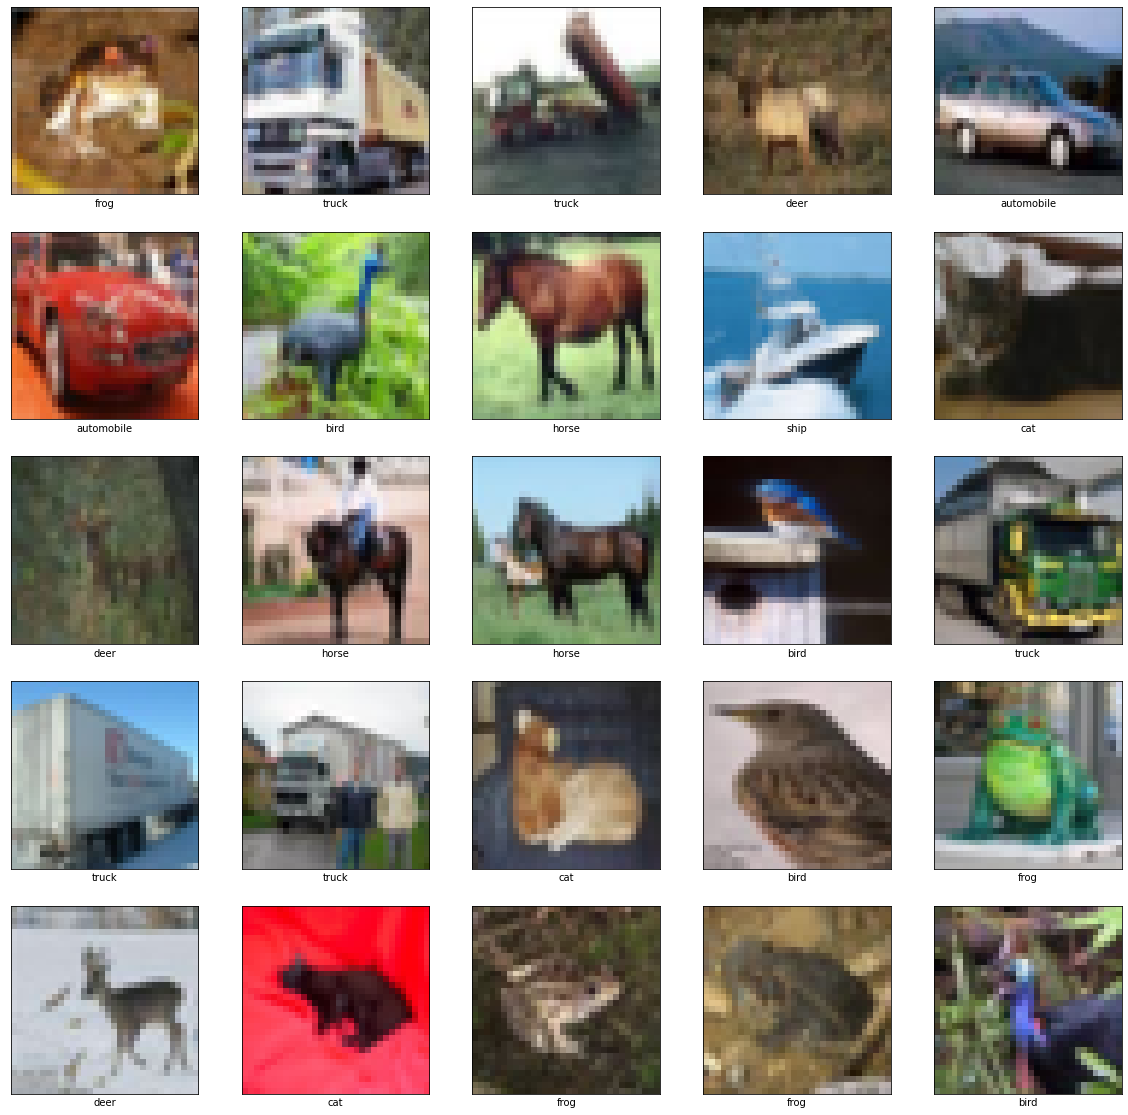

In [10]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[trainY[i][0]])
plt.show()

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [57]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
history = model.fit(trainX, trainY, epochs=10,
                   validation_data=(testX, testY))

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5037 - accuracy: 0.4542 - val_loss: 1.2262 - val_accuracy: 0.5558
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1379 - accuracy: 0.6004 - val_loss: 1.0433 - val_accuracy: 0.6339
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9881 - accuracy: 0.6531 - val_loss: 0.9775 - val_accuracy: 0.6617
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8894 - accuracy: 0.6902 - val_loss: 0.9311 - val_accuracy: 0.6775
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8171 - accuracy: 0.7152 - val_loss: 0.8602 - val_accuracy: 0.7054
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7579 - accuracy: 0.7351 - val_loss: 0.8694 - val_accuracy: 0.6986
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7079 - accuracy: 0.7531 - val_loss: 0.8526 -

In [59]:
model.evaluate(testX,testY)

313/313 [==============================] - 2s 7ms/step - loss: 0.8987 - accuracy: 0.7128


[0.8987278342247009, 0.7128000259399414]

313/313 - 2s - loss: 0.8987 - accuracy: 0.7128 - 2s/epoch - 7ms/step


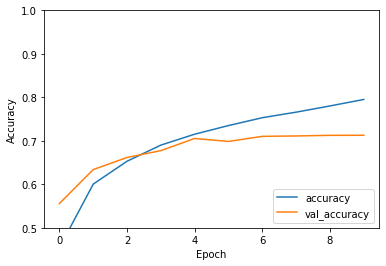

In [60]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

In [61]:
print(test_acc)

0.7128000259399414


In [77]:
from keras.models import load_model 
model.save('project_model.h5')

In [78]:
#loading the saved model 
from keras.models import load_model 
model = load_model('project_model.h5')

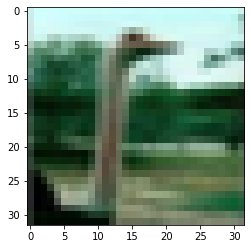

1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Dog


In [101]:
idx2= random.randint(0,len(testY))
plt.imshow(testX[idx2,:])
plt.show()

test =img_to_array(test1) 
test =np.expand_dims(test, axis =0) 
result = model.predict(test)
print(result)
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

In [102]:
import numpy as np 
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
# Give the link of the image here to test 
test1 =load_img('dog1.png',target_size =(32,32))

In [103]:
# idx2= random.randint(0,len(testY))
# plt.imshow(testX[idx2,:])
# plt.show()

# result = model.predict(testX[idx2,:].reshape(1,32,32,3))
# print(result)
test =img_to_array(test1) 
test =np.expand_dims(test, axis =0) 
result = model.predict(test) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Dog
